# Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

Using TensorFlow backend.


In [4]:
test_folder = '../data/test'
train_folder = '../data/train'
val_folder = '../data/val'

In [5]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64,64), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64,64), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64,64), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [6]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [8]:
train_img.shape

(5216, 12288)

# Modeling

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Dropout(0.75))  

model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Dropout(0.05))  

model.add(layers.Conv2D(18, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Dropout(0.0025)) 

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

history = model.fit(train_images,
                    train_y,
                    epochs=7,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.5665 - acc: 0.7427 - recall: 0.0000e+00 - val_loss: 0.6913 - val_acc: 0.5625 - val_recall: 0.1250
Epoch 2/7
5216/5216 [==============================] - 5s 912us/step - loss: 0.5481 - acc: 0.7433 - recall: 0.0067 - val_loss: 0.6855 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 3/7
5216/5216 [==============================] - 5s 1ms/step - loss: 0.4857 - acc: 0.7719 - recall: 0.1879 - val_loss: 0.6770 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 4/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.3933 - acc: 0.8230 - recall: 0.4907 - val_loss: 0.6732 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 5/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.3458 - acc: 0.8399 - recall: 0.5981 - val_loss: 0.6384 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 6/7
5216/5216 [==============================] - 5s 982us/step - loss: 0.3304 - acc: 0.

In [11]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 3s 501us/step


In [15]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 0s 438us/step


In [16]:
results_train

[0.7590040165953841, 0.43059815950920244, 0.9999999999254288]

In [17]:
results_test

[0.7231586835323236, 0.47596153846153844, 0.9999999995726496]

In [18]:
model.predict_classes(val_images)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

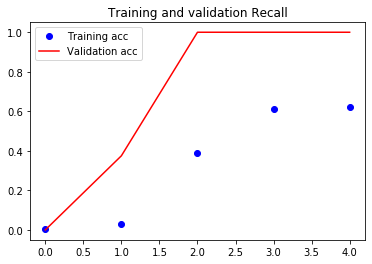

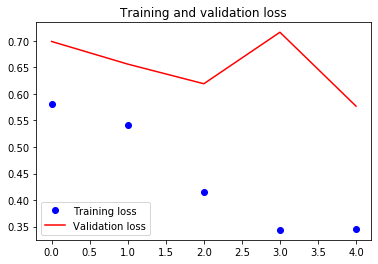

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = history.history['recall']
val_rec = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()